# Importing Libraries

In [1]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator,FixedFormatter
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, f1_score,
    precision_score, recall_score, jaccard_score, log_loss,
    roc_curve, roc_auc_score, classification_report
)
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Loading Data

In [2]:
# Set the working directory
data_dir = r"C:\Users\Mark\Desktop\datasets"
os.chdir(data_dir)

In [3]:
# Load the dataset
dataset_file = "watson_healthcare_modified.csv"
data = pd.read_csv(dataset_file)
df = data.copy()
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Explore the dataset
print("Dataset Summary:")
df.describe()

Dataset Summary:


,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.676000e+03,1676.000000,1676.000000,1676.000000,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,1.456796e+06,36.866348,800.557876,9.221957,2.907518,1.0,2.714797,65.470167,2.724940,2.066826,...,2.718377,80.0,0.806086,11.338902,2.805489,2.766110,7.033413,4.264916,2.200477,4.135442
std,2.487486e+05,9.129126,401.594438,8.158118,1.025835,0.0,1.097534,20.207572,0.714121,1.113423,...,1.078162,0.0,0.855527,7.834996,1.288431,0.702369,6.098991,3.627456,3.229587,3.559662
min,1.025177e+06,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.235832e+06,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.464606e+06,36.000000,796.500000,7.000000,3.000000,1.0,3.000000,65.500000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1.667992e+06,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,1.886378e+06,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
print("\nData Information:")
df.info()


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLe

In [6]:
# Check for missing values
missing_values = df.isna().sum()
print("\nMissing Values:")
missing_values


Missing Values:


EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
# Drop unnecessary columns
columns_to_drop = ['EmployeeID', 'Over18']
df = df.drop(columns_to_drop,axis=1)

# Correlation Matrix

In [8]:
# Calculate and visualize the correlation matrix
correlation_matrix = df.corr()

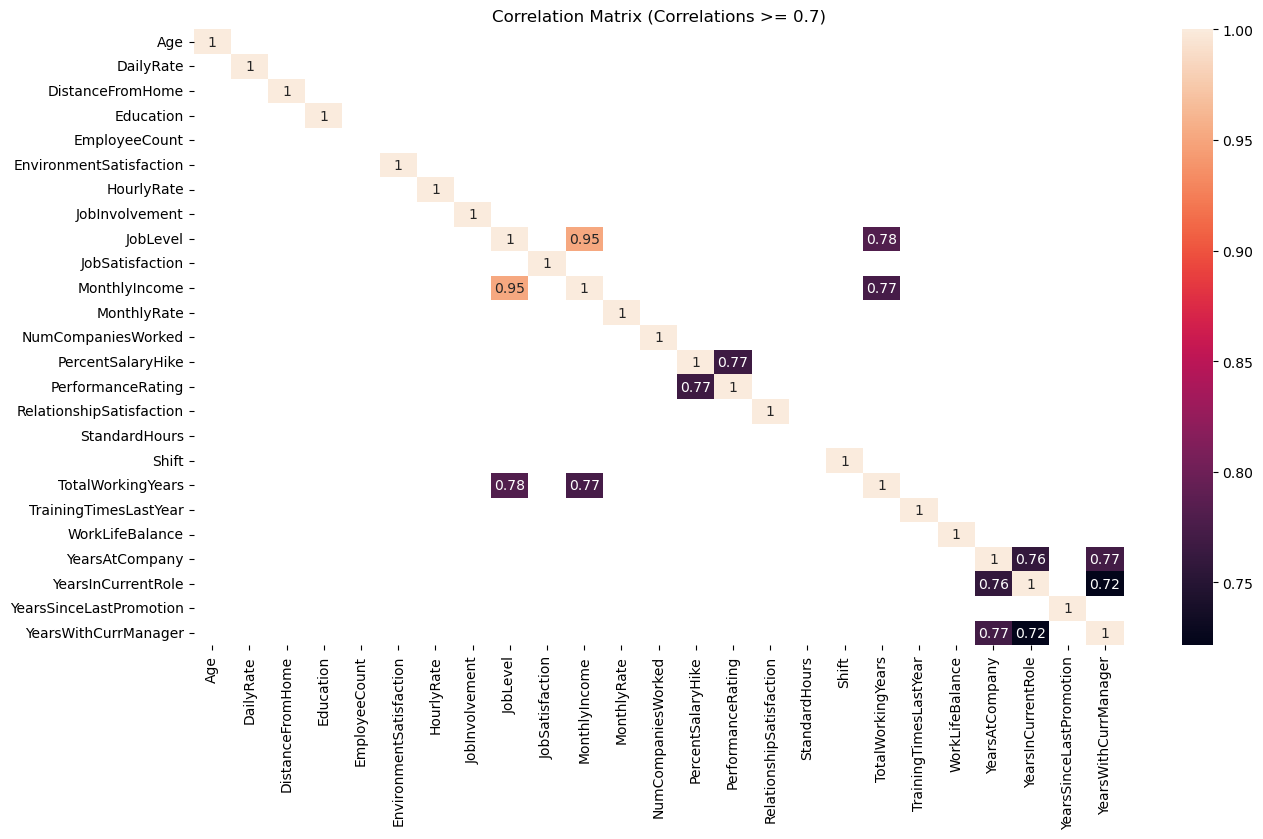

In [9]:
# Calculate the correlation matrix
correlation = df.corr()

# Create a mask to select only correlations greater than or equal to 0.7
plt.figure(figsize=(15, 8))
sns.heatmap(correlation, mask=correlation < 0.7, annot=True)
plt.title('Correlation Matrix (Correlations >= 0.7)')
plt.show()

In [10]:
columns_to_drop = ["MonthlyIncome", "TotalWorkingYears", "PercentSalaryHike", "YearsInCurrentRole", "YearsWithCurrManager"]
df = df.drop(columns_to_drop,axis=1)

In [11]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsSinceLastPromotion'],
      dtype='object')

# EDA

In [12]:
# Visualize numeric columns
def visualize_numeric_columns(dataframe, columns, rows, cols):
    num_plots = len(columns)
    num_rows = (num_plots + cols - 1) // cols

    fig, axes = plt.subplots(num_rows, cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        sns.histplot(data=dataframe, x=column, kde=True, color='blue', bins=30, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Density')

    for i in range(num_plots, num_rows * cols):
        fig.delaxes(axes[i])

    fig.tight_layout()
    plt.show()

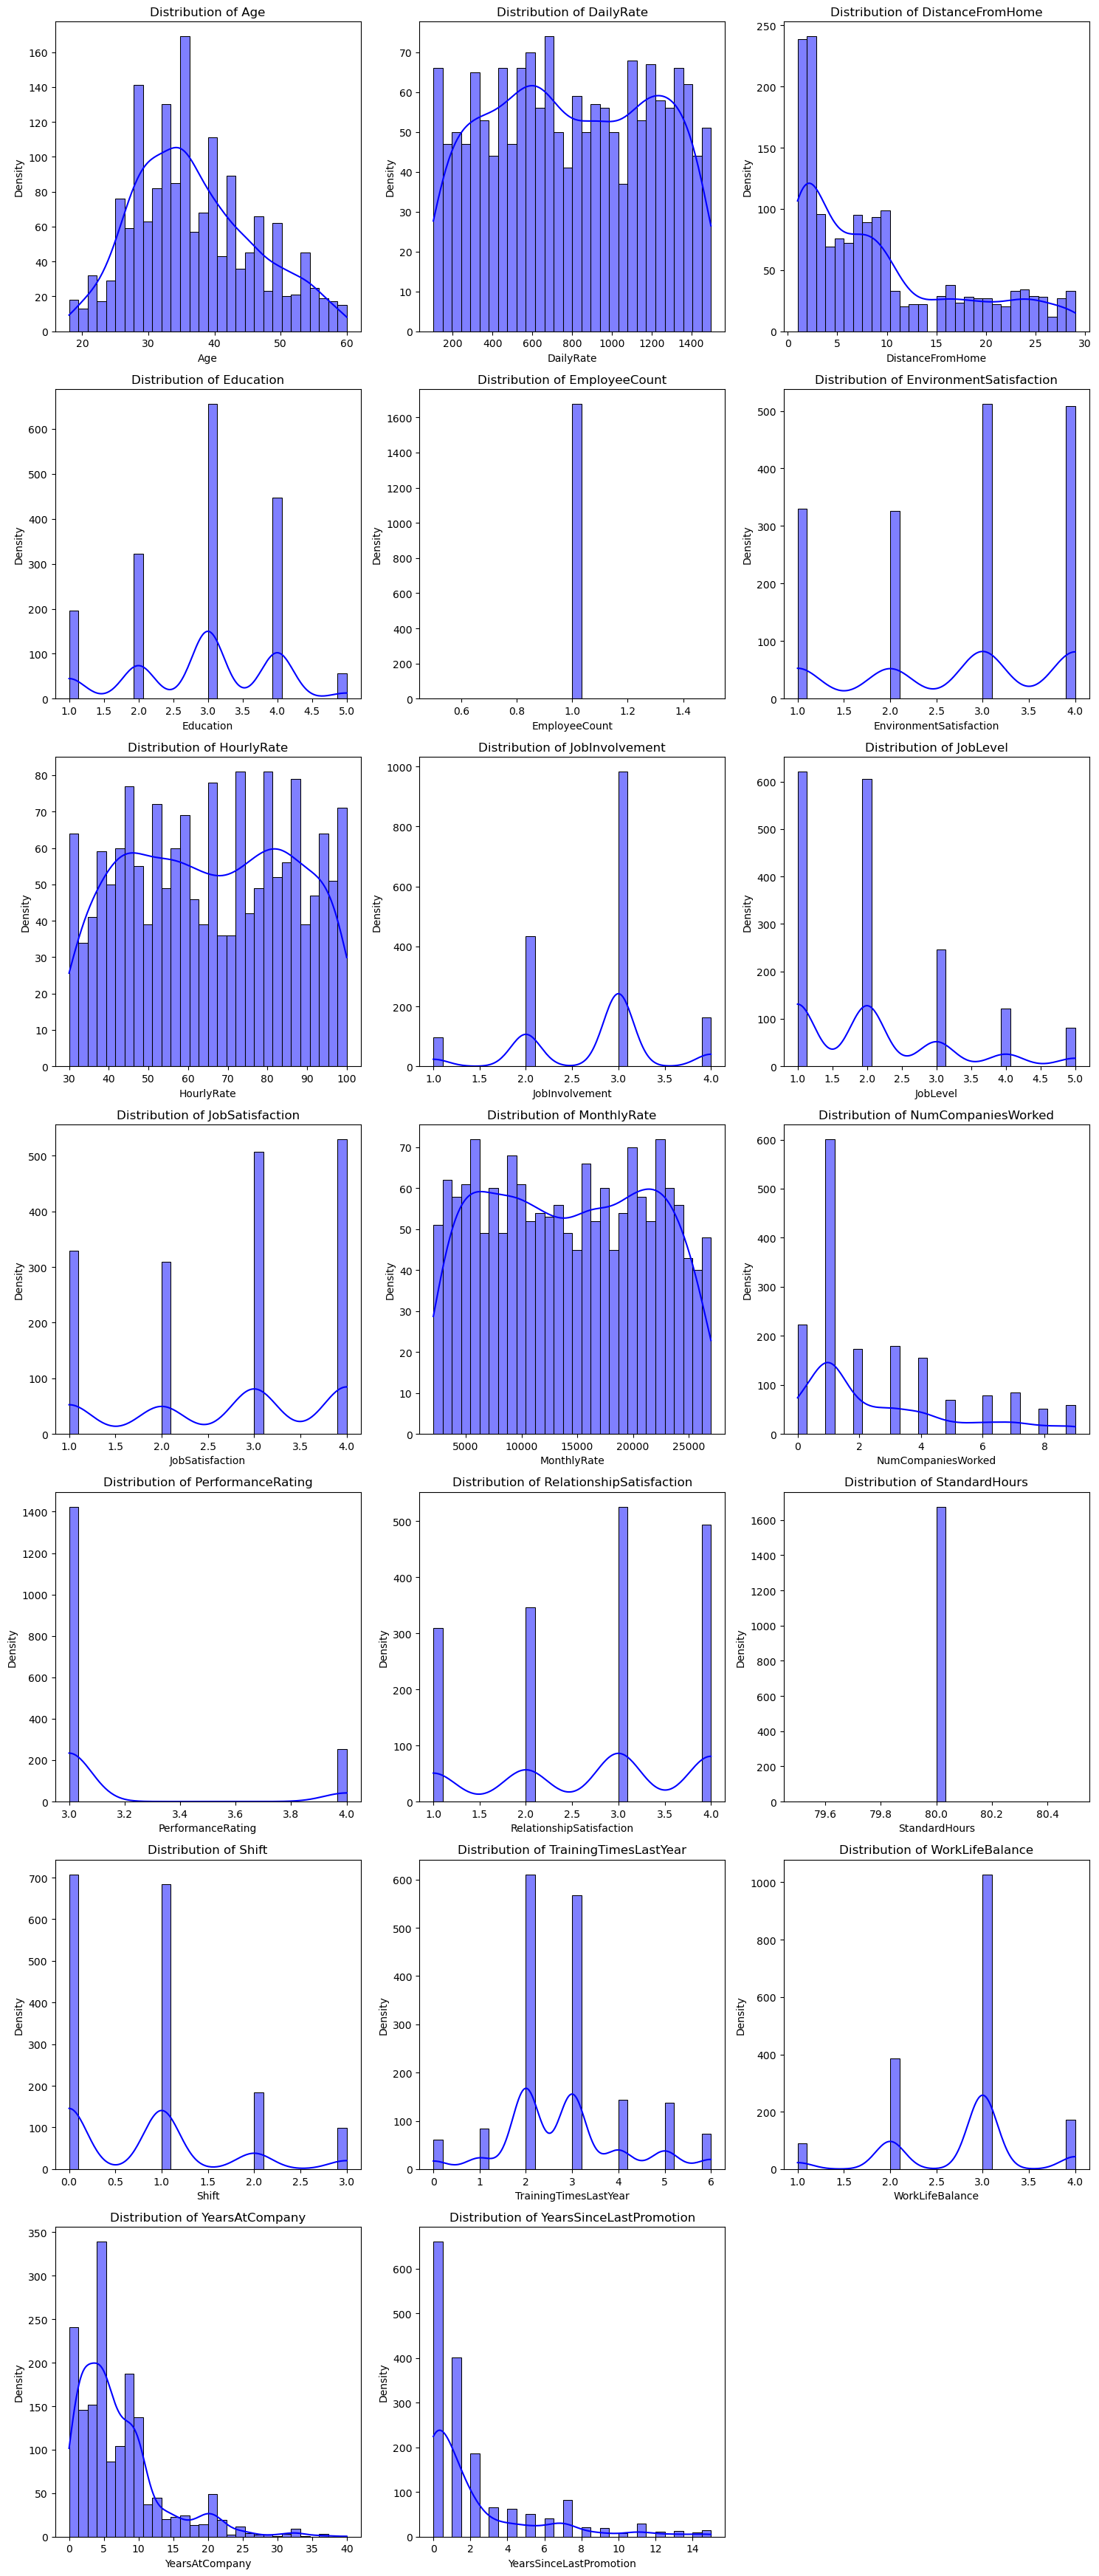

In [13]:
numeric_columns = df.select_dtypes(include=np.number).columns
visualize_numeric_columns(df, numeric_columns, rows=2, cols=3)

In [14]:
def scatter_plots_with_attrition(dataframe):
    # Calculate the number of rows needed for subplots
    num_features = len(numeric_columns)
    num_plots_per_row = 3
    num_rows = (num_features + num_plots_per_row - 1) // num_plots_per_row

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    # Plot scatter plots
    for i, feature in enumerate(numeric_columns):
        row = i // num_plots_per_row
        col = i % num_plots_per_row

        ax = axes[i]
        ax.scatter(dataframe[feature], dataframe["Attrition"], alpha=0.5)
        ax.set_xlabel(feature)
        ax.set_ylabel("Attrition_Yes")
        ax.set_title(f"Scatter Plot of {feature} vs. Attrition")

    # Remove any empty subplots
    for i in range(num_features, num_rows * num_plots_per_row):
        fig.delaxes(axes[i])

    # Adjust spacing
    fig.tight_layout()

    # Show the plots
    plt.show()

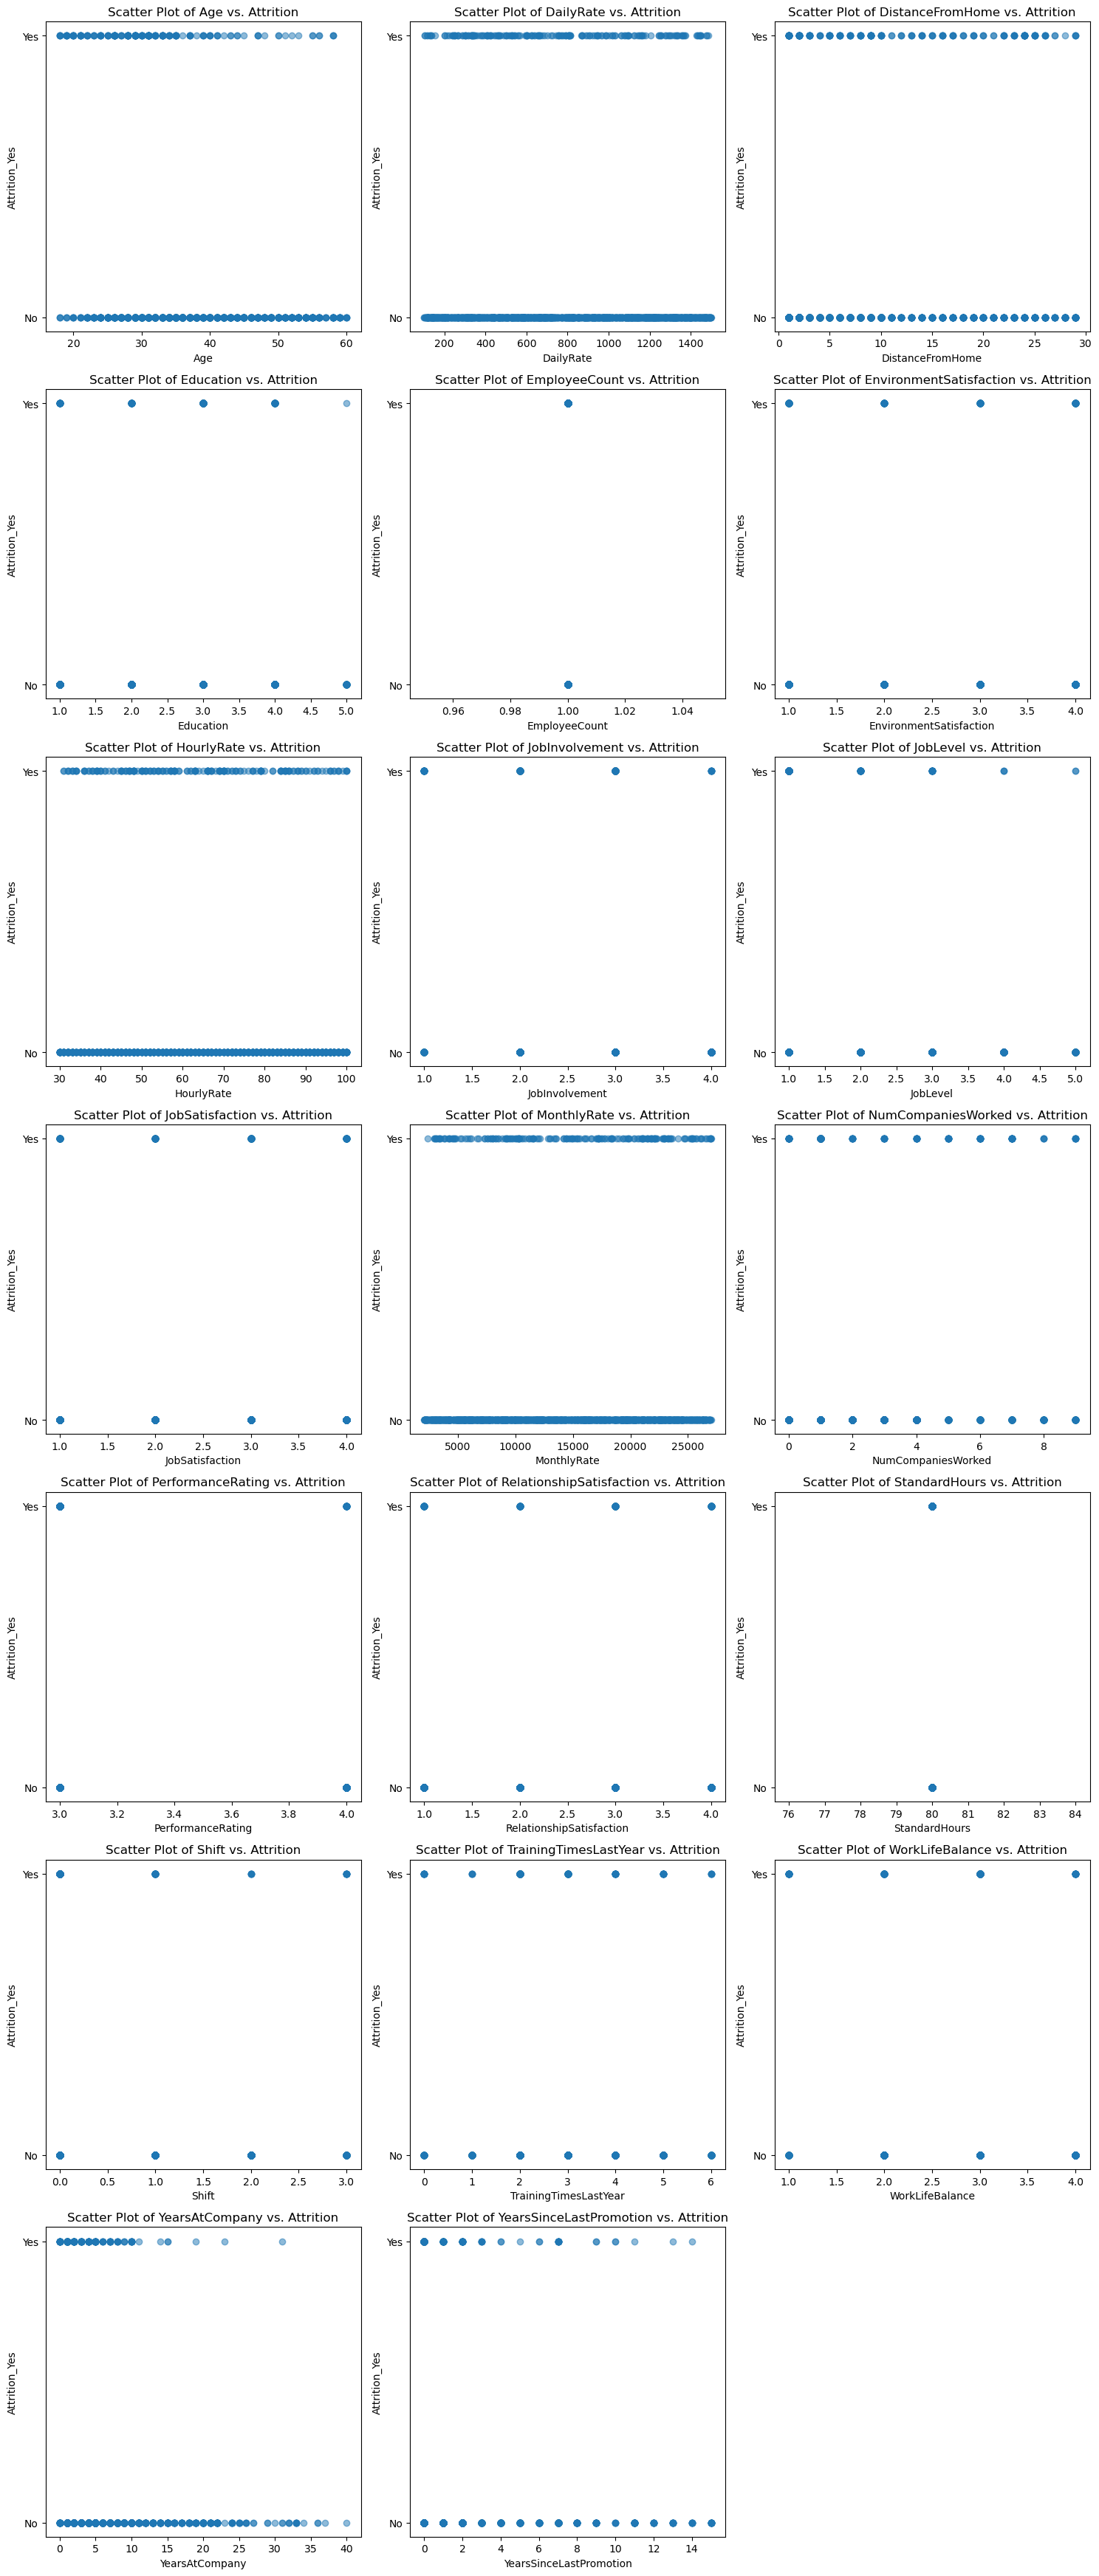

In [15]:
scatter_plots_with_attrition(df)

Observations: It is evident that there is no significant linear relationship between any of the numerical features and the target feature

In [16]:
def create_box_plots(df, numeric_columns):
    # Create a figure with subplots
    num_cols = len(numeric_columns)
    num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
    fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
    axs = axs.flatten()

    # Create a box plot for each numerical variable using Seaborn with hue='Attrition'
    for i, var in enumerate(numeric_columns):
        sns.boxplot(x='Attrition', y=var, data=df, ax=axs[i])
        axs[i].set_title(f'{var} vs Attrition')
        axs[i].set_xlabel('Attrition')
        axs[i].set_ylabel(var)

    # Remove any extra empty subplots if needed
    if num_cols < len(axs):
        for i in range(num_cols, len(axs)):
            fig.delaxes(axs[i])

    # Adjust spacing between subplots
    fig.tight_layout()

    # Show plot
    plt.show()

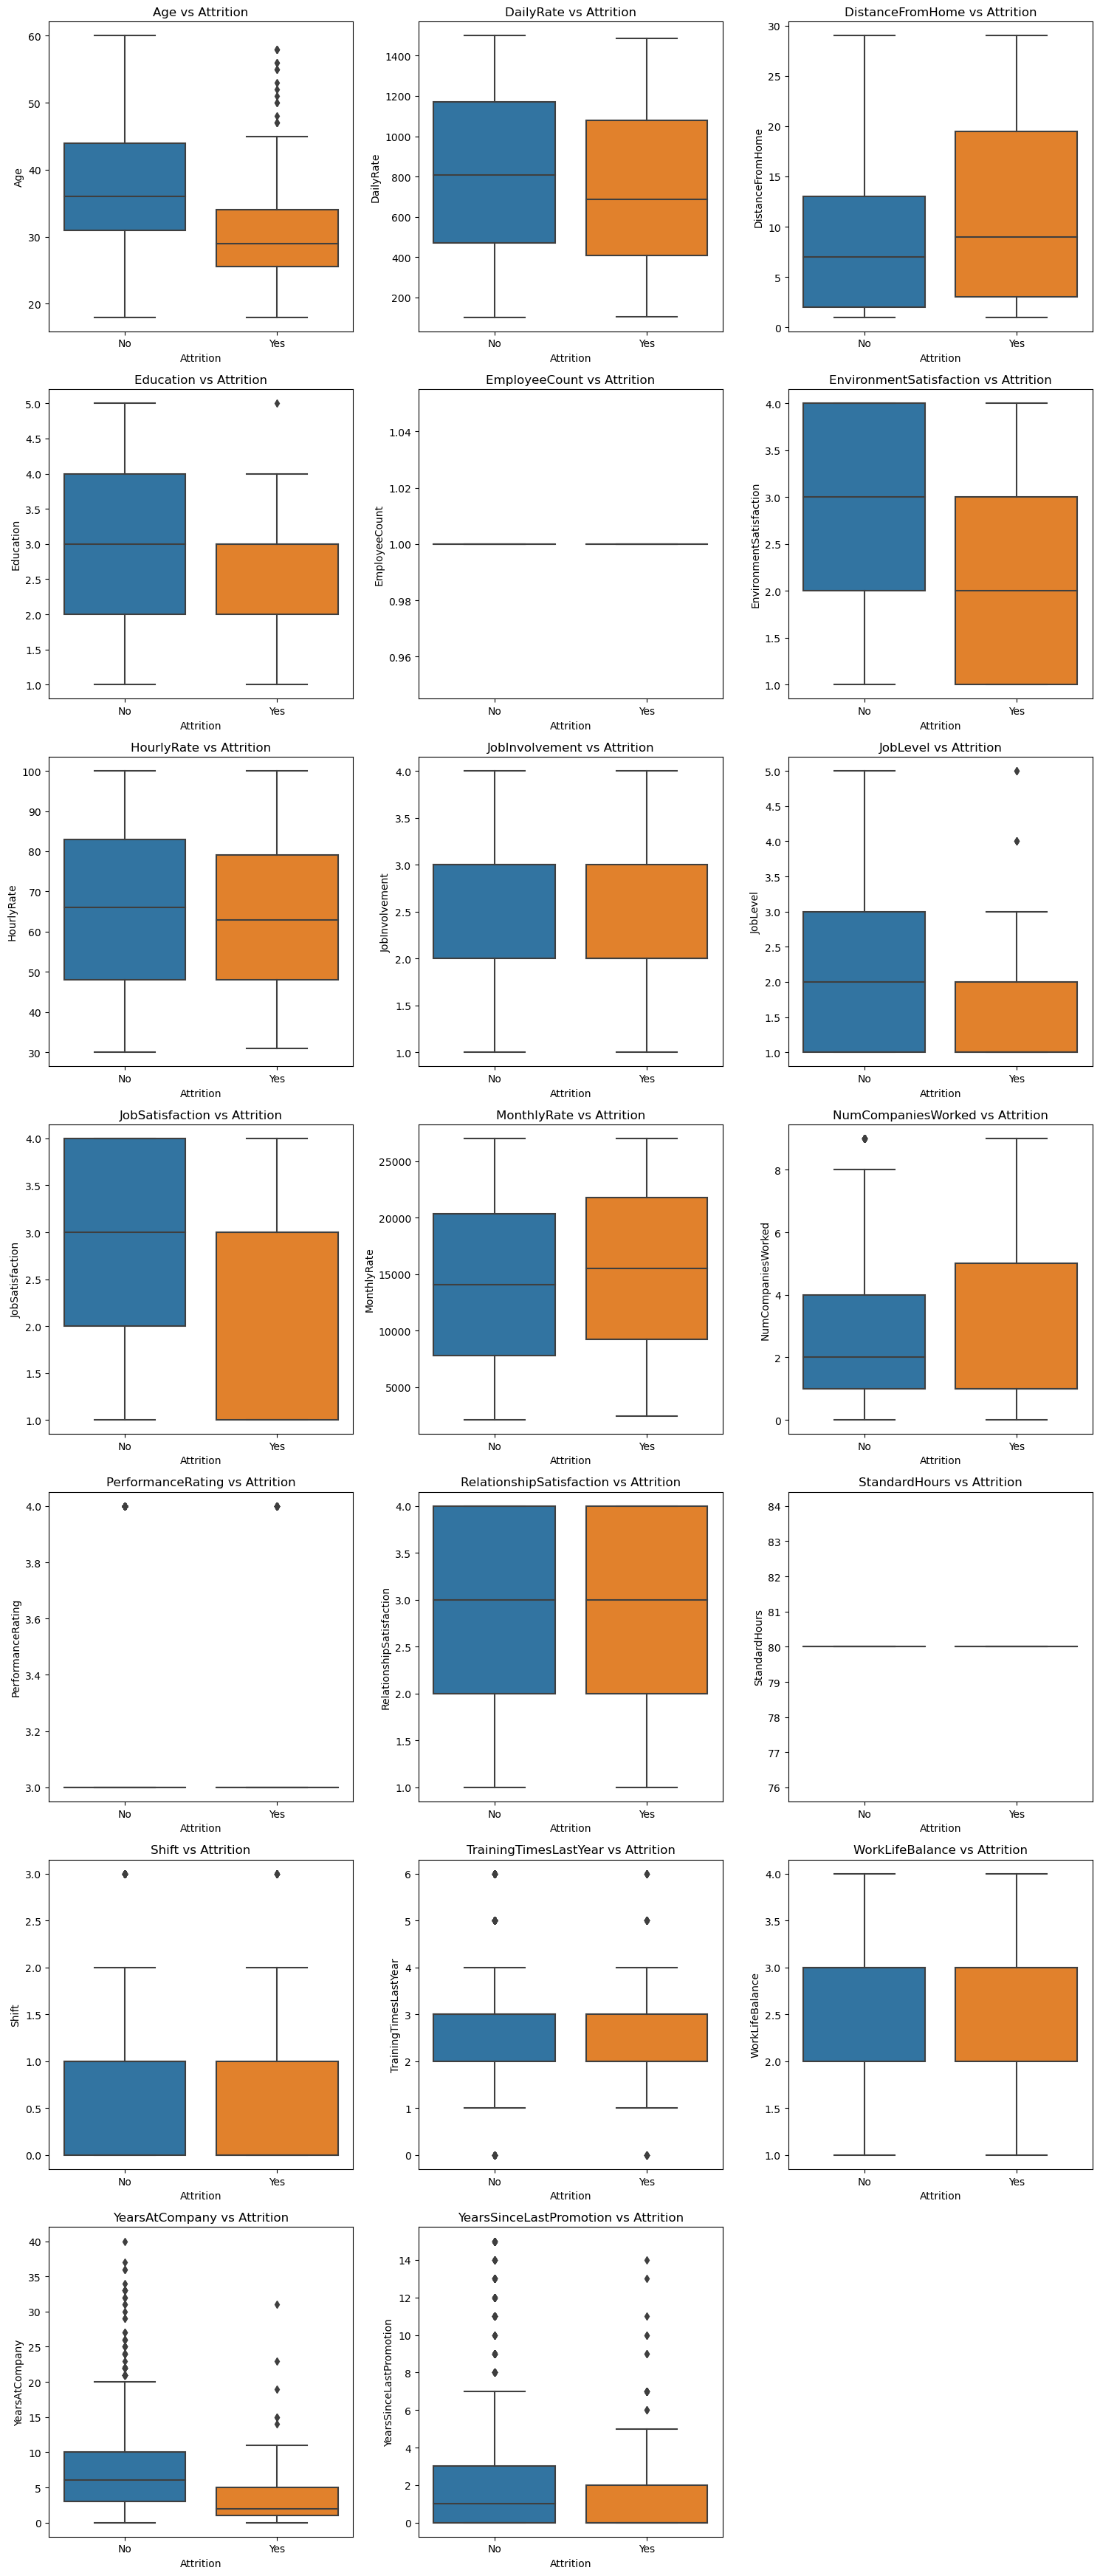

In [17]:
# Call the create_box_plots function
create_box_plots(df, numeric_columns)

In [18]:
# Visualize categorical columns
def visualize_categorical_columns(dataframe, columns, target_column):
    num_vars = len(columns)
    num_cols = min(num_vars, 3)
    num_rows = (num_vars + num_cols - 1) // num_cols

    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

    for i, var in enumerate(columns):
        row = i // num_cols
        col = i % num_cols

        sns.histplot(x=var, hue=target_column, data=dataframe, ax=axs[row, col],
                     multiple="fill", kde=False, element="bars", fill=True, stat='density')

        x_ticks = range(len(dataframe[var].unique()))
        x_tick_labels = dataframe[var].unique()

        axs[row, col].xaxis.set_major_locator(FixedLocator(x_ticks))
        axs[row, col].xaxis.set_major_formatter(FixedFormatter(x_tick_labels))

        axs[row, col].tick_params(axis='x', rotation=45)
        axs[row, col].set_xlabel(var)

        total_count = dataframe[var].count()
        percentages = dataframe.groupby([var, target_column]).size() / total_count * 100
        for p in axs[row, col].patches:
            if p.get_height() > 0:
                axs[row, col].annotate(f'{p.get_height() * 100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                                       ha='center', va='center', fontsize=10, color='black')

    for i in range(num_vars, num_rows * num_cols):
        fig.delaxes(axs.flatten()[i])

    fig.tight_layout()
    plt.show()

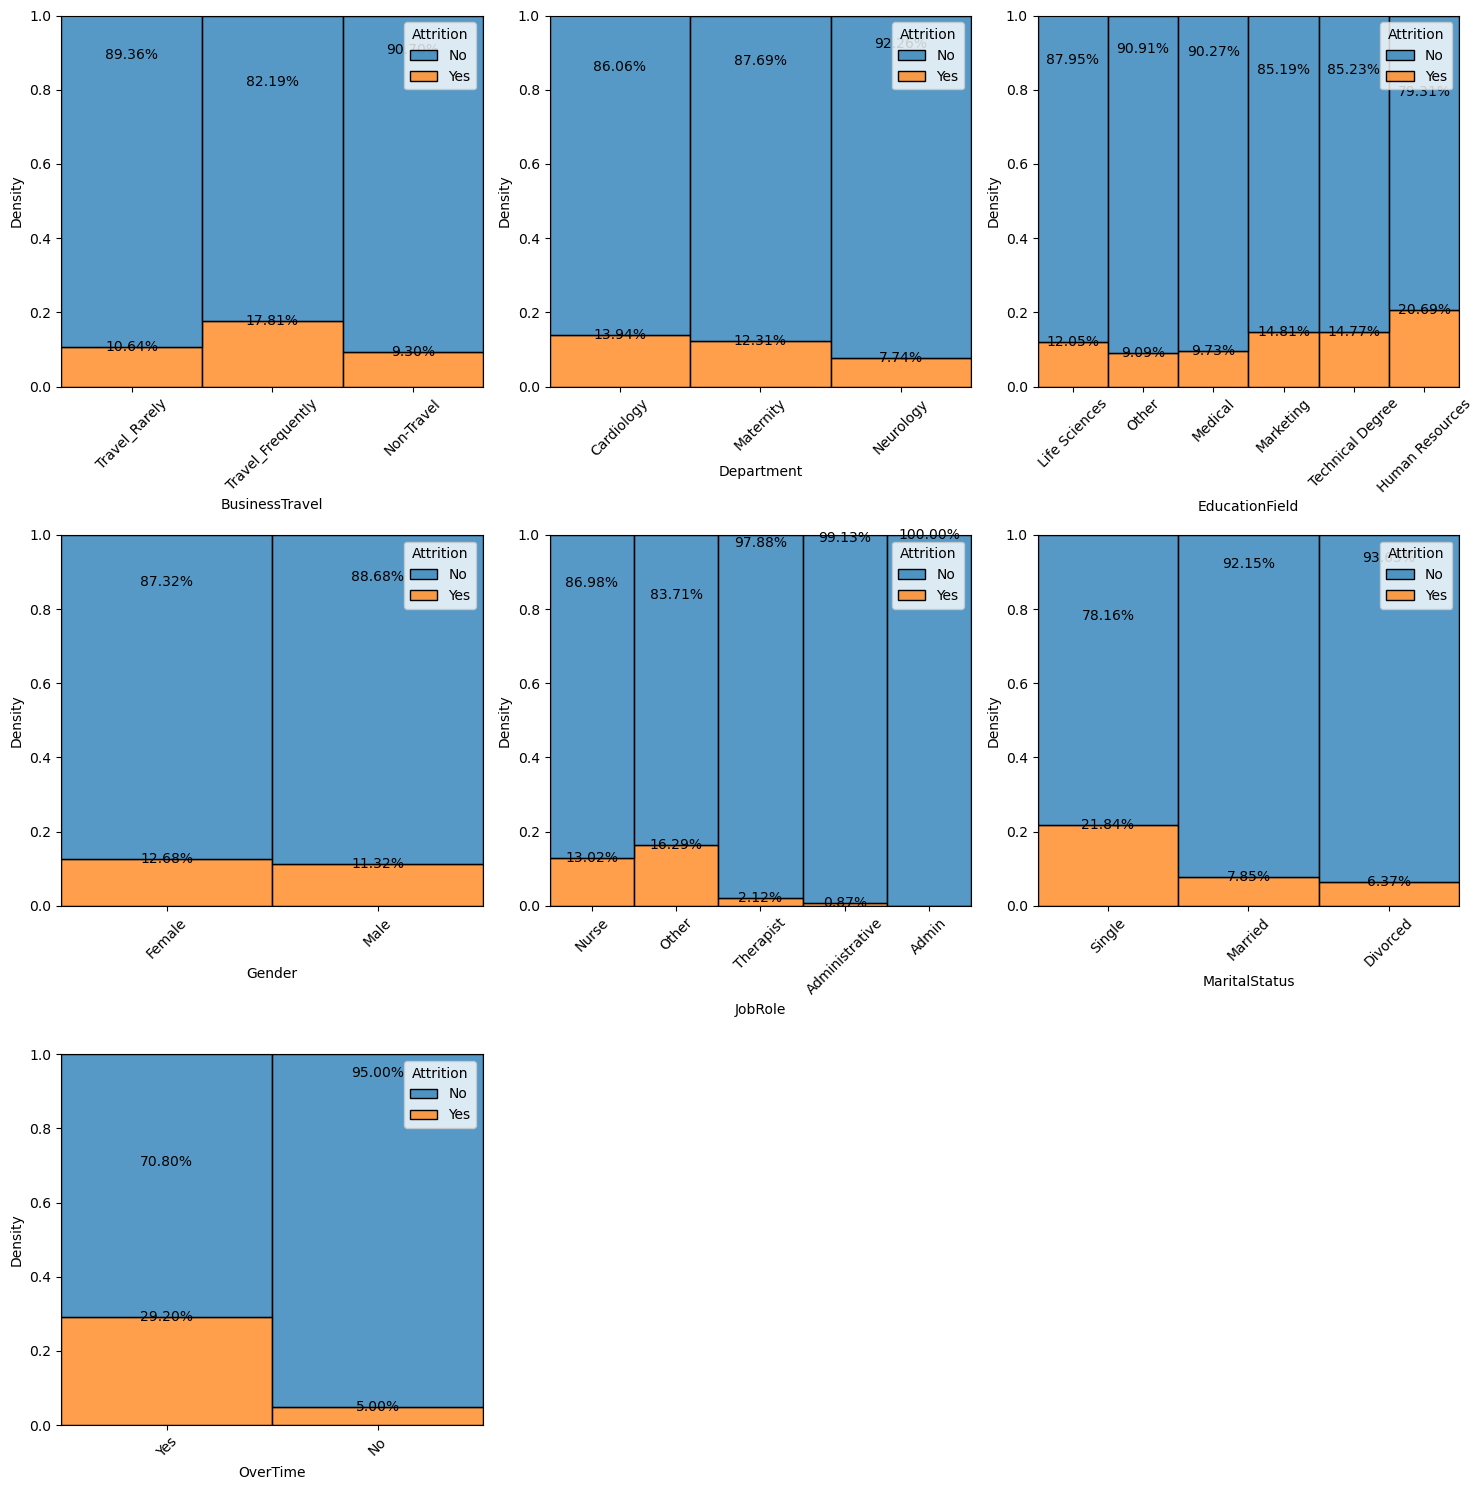

In [19]:
categorical_columns = df.select_dtypes(exclude=np.number).drop(columns='Attrition').columns
visualize_categorical_columns(df, categorical_columns, target_column='Attrition')

In [20]:
# Remove unnecessary numeric columns
numeric_columns_to_drop = ['EmployeeCount','StandardHours']
df = df.drop(numeric_columns_to_drop, axis=1)

In [21]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'Shift', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion'],
      dtype='object')

# Data Preprocessing

In [22]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Attrition: ['No' 'Yes']
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Cardiology' 'Maternity' 'Neurology']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Female' 'Male']
JobRole: ['Nurse' 'Other' 'Therapist' 'Administrative' 'Admin']
MaritalStatus: ['Single' 'Married' 'Divorced']
OverTime: ['Yes' 'No']


In [23]:
# Create one-hot encoded variables for categorical columns
cat_vars = df.select_dtypes(exclude=np.number).columns.tolist()
cat_encoded = pd.get_dummies(df[cat_vars], drop_first=True)

In [24]:
# Combine one-hot encoded variables with numeric columns
combined_df = pd.concat([df.select_dtypes(include=np.number), cat_encoded], axis=1)

# Splitting Data

In [25]:
# Prepare data for modeling
X = combined_df.drop(columns=["Attrition_Yes"])
y = combined_df["Attrition_Yes"]

In [26]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Decision Tree Classifier

In [28]:
# Decision Tree Classifier
def train_decision_tree(X_train, y_train):
    # Create a Decision Tree Classifier with class balancing
    dtree = DecisionTreeClassifier(class_weight='balanced')

    # Define a grid of hyperparameters to search over
    param_grid = {
        'max_depth': [7, 8, 9, 10, 11],
        'min_samples_split': [2, 3, 4],
        'min_samples_leaf': [1, 2, 3],
        'random_state': [0, 42]
    }

    # Perform a grid search with cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(dtree, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters
    best_params = grid_search.best_params_
    print("Best Decision Tree Hyperparameters:", best_params)

    # Create the Decision Tree Classifier with the best hyperparameters
    best_model = DecisionTreeClassifier(**best_params, class_weight='balanced')

    # Fit the best model to the training data
    best_model.fit(X_train, y_train)

    return best_model

In [29]:
# Train the Decision Tree Classifier
best_dtree_model = train_decision_tree(X_train, y_train)

Best Decision Tree Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}


In [30]:
# Make predictions on the test data
y_pred_dtree = best_dtree_model.predict(X_test)

In [31]:
# Evaluate the Decision Tree Classifier
def evaluate_classifier(y_true, y_pred, classifier_name):
    # Print classification report
    print(f"{classifier_name} Classification Report:")
    print(classification_report(y_true, y_pred))

    # Calculate and print the accuracy score
    accuracy = accuracy_score(y_true, y_pred)
    print(f"{classifier_name} Accuracy Score: {round(accuracy * 100, 2)}%")

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{classifier_name} Confusion Matrix')
    plt.show()

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       429
           1       0.51      0.51      0.51        74

    accuracy                           0.85       503
   macro avg       0.71      0.71      0.71       503
weighted avg       0.86      0.85      0.86       503

Decision Tree Accuracy Score: 85.49%


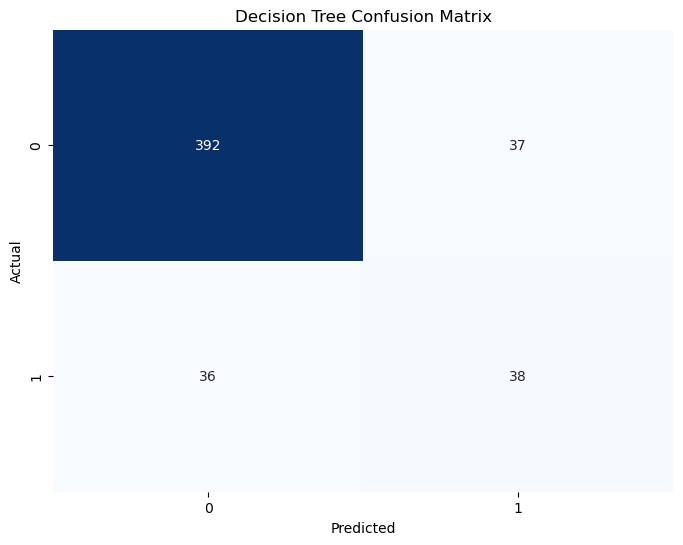

In [32]:
evaluate_classifier(y_test, y_pred_dtree, classifier_name="Decision Tree")

# Random Forest Classifier

In [33]:
# Random Forest Classifier
def train_random_forest(X_train, y_train):
    rd = RandomForestClassifier()

    # Define a parameter grid for hyperparameter tuning
    param_grid = {
        "n_estimators": [40, 50, 100, 200, 400],
        "criterion": ["gini", "entropy"],
        "max_depth": [1, 5, 10, None],
        "max_features": ["sqrt", "log2", None]
    }

    # Perform a grid search with cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(estimator=rd, param_grid=param_grid, cv=5, verbose=1, scoring="accuracy")
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters
    best_params = grid_search.best_params_
    print("Best Random Forest Hyperparameters:", best_params)

    # Create the Random Forest Classifier with the best hyperparameters
    best_rf_model = RandomForestClassifier(**best_params)

    # Fit the best model to the training data
    best_rf_model.fit(X_train, y_train)

    return best_rf_model

In [34]:
# Train the Random Forest Classifier
best_rf_model = train_random_forest(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Random Forest Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'n_estimators': 200}


In [35]:
# Make predictions on the test data
y_pred_rf = best_rf_model.predict(X_test)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       429
           1       0.89      0.46      0.61        74

    accuracy                           0.91       503
   macro avg       0.90      0.73      0.78       503
weighted avg       0.91      0.91      0.90       503

Random Forest Accuracy Score: 91.25%


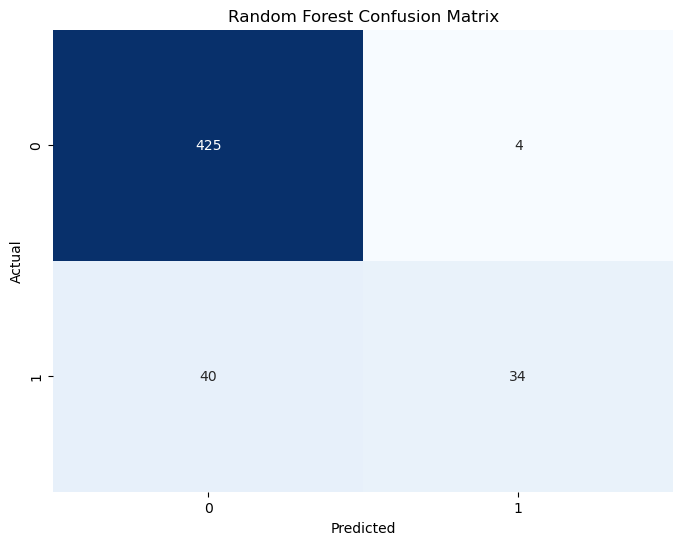

In [36]:
# Evaluate the Random Forest Classifier
evaluate_classifier(y_test, y_pred_rf, classifier_name="Random Forest")

# XGBoost Classifier

In [37]:
# XGBoost Classifier
def train_xgboost(X_train, y_train):
    xgb = XGBClassifier()

    # Define a parameter grid for hyperparameter tuning
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.1, 0.01, 0.001],
        'gamma': [0, 0.1, 0.2]
    }

    # Perform a grid search with cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(xgb, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters
    best_params = grid_search.best_params_
    print("Best XGBoost Hyperparameters:", best_params)

    # Create the XGBoost Classifier with the best hyperparameters
    best_xgb_model = XGBClassifier(**best_params)

    # Fit the best model to the training data
    best_xgb_model.fit(X_train, y_train)

    return best_xgb_model


In [38]:
# Train the XGBoost Classifier
best_xgb_model = train_xgboost(X_train, y_train)

Best XGBoost Hyperparameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [39]:
# Make predictions on the test data
y_pred_xgb = best_xgb_model.predict(X_test)

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       429
           1       0.86      0.51      0.64        74

    accuracy                           0.92       503
   macro avg       0.89      0.75      0.80       503
weighted avg       0.91      0.92      0.91       503

XGBoost Accuracy Score: 91.65%


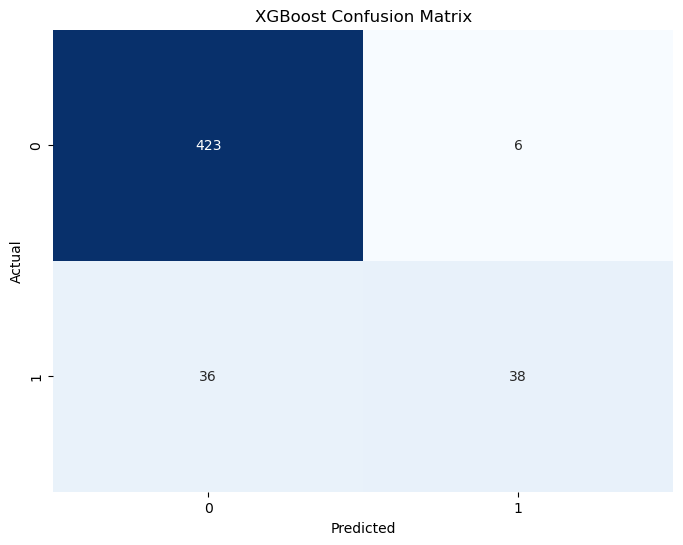

In [40]:
# Evaluate the XGBoost Classifier
evaluate_classifier(y_test, y_pred_xgb, classifier_name="XGBoost")

In [41]:
# Plot ROC curve for XGBoost
def plot_roc_curve(y_true, y_pred_proba):
    fpr, tpr, tr = roc_curve(y_true, y_pred_proba)
    auc = roc_auc_score(y_true, y_pred_proba)

    plt.plot(fpr, tpr, label='AUC = %0.2f' % auc)
    plt.plot(fpr, fpr, linestyle='--', color='k')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

In [42]:
# Get predicted probabilities for XGBoost
y_pred_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

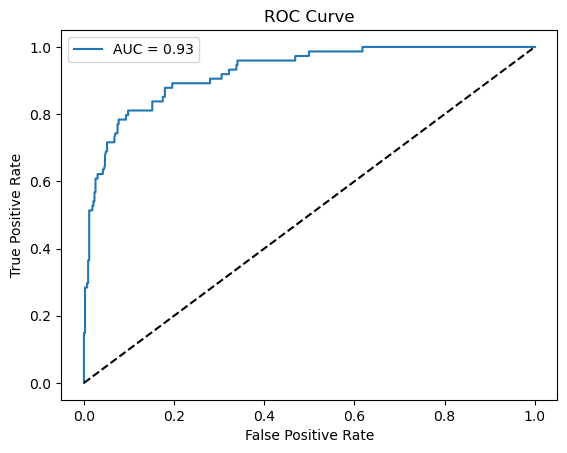

In [43]:
# Plot ROC curve for XGBoost
plot_roc_curve(y_test, y_pred_proba_xgb)

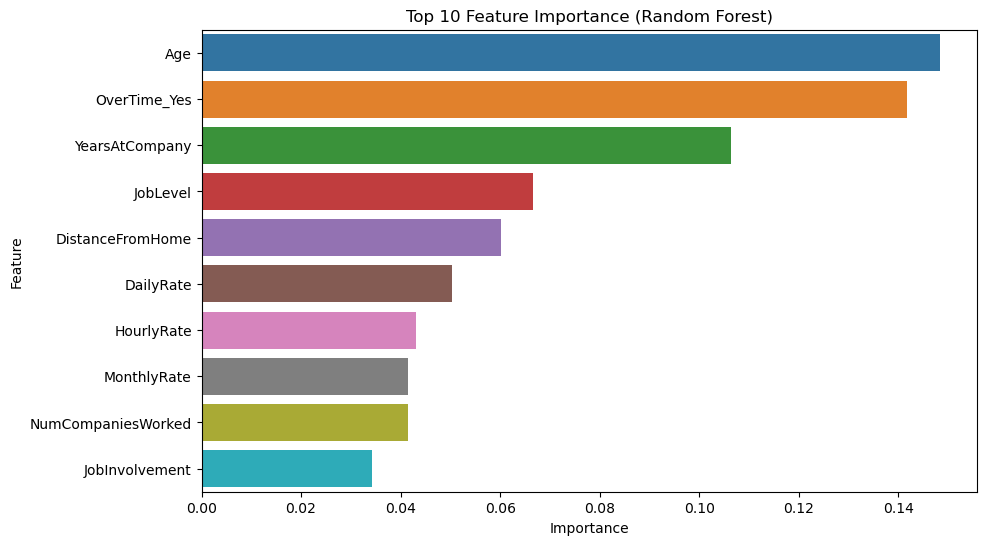

In [44]:
# Feature Importance for Random Forest
def plot_feature_importance(model, feature_names):
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)[::-1]

    top_features = feature_names[sorted_idx][:10]
    top_importance = feature_importance[sorted_idx][:10]

    plt.figure(figsize=(10, 6))
    sns.barplot(y=top_features, x=top_importance, orient="h")
    plt.title('Top 10 Feature Importance (Random Forest)')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

feature_names = combined_df.drop(columns=["Attrition_Yes"]).columns
plot_feature_importance(best_rf_model, feature_names)